### Project Overview

<p>
Welcome to our Wine Quality Prediction project! We're using smart computer techniques to guess how good a wine might be. We collected lots of information about different wines from a place called Kaggle. Then, we looked at this info really closely, figuring out the important bits that help predict wine quality.
After that, we used some super cool math tricks to create a smart program (we call it a model) that can predict wine quality accurately. Now, anyone can use our project to quickly find out if a wine is awesome or just okay. It's like having a personal wine quality expert at your fingertips! Cheers to predicting great wines! 🍷🤖</p>

<img style="margin-right:200px;" src="life_cycle.png" width="300px" height="300px">


**STEPS**
- Data Collection [kaggle](https://www.kaggle.com/datasets/rajyellow46/wine-quality?rvi=1)
- Feature Engineering
- Featue Scaling
- Model Creation
- Evolution of Model

#### Attribute Information:


Input variables (based on physicochemical tests):

1.fixed acidity
2.volatile acidity
3.citric acid
4.residual sugar
5.chlorides
6.free sulfur dioxide
7.total sulfur dioxide
8.density
9.pH
10.sulphates
11.alcohol

12.  quality (score between 0 and 10) Output variable (based on sensory data):


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/wine-quality/winequalityN.csv')


#### Exploratary Data Analysis

In [3]:
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [4]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['type']=label.fit_transform(df['type']) #white=1,red=0

In [5]:
## info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int32  
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int32(1), int64(1)
memory usage: 634.6 KB


In [6]:
## size of the dataframe
df.shape

(6497, 13)

In [7]:
## duplicated rows
df.duplicated().any()

True

In [8]:
## droping druplicate
df.drop_duplicates(inplace=True)

In [9]:
df.shape ## shape of df after removing the dataset

(5329, 13)

In [10]:
## Missing values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

<Axes: >

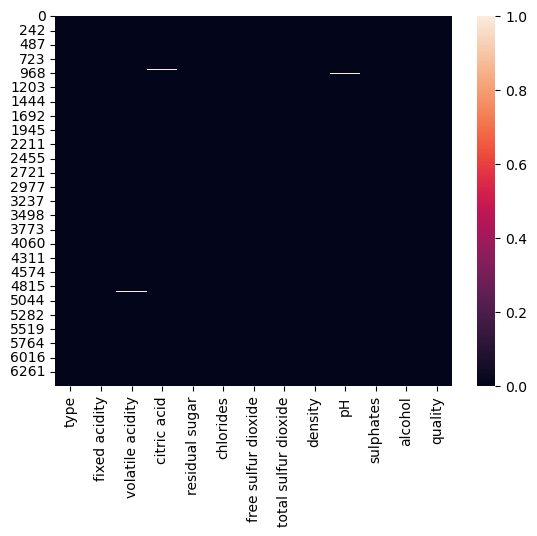

In [11]:
sns.heatmap(df.isnull())

- columns are fixed acidity,volatile acidity,citric acide,residual sugar,chlorides,pH,sulphates are have the some of null values init

### Handling Missing Values

In [12]:
## missing columns
columns_having_missing ={}
for column in df.columns:
    if df[column].isnull().sum() > 0: 
        columns_having_missing[column] = df[column].isnull().sum()
print(columns_having_missing)

{'fixed acidity': 10, 'volatile acidity': 8, 'citric acid': 3, 'residual sugar': 2, 'chlorides': 2, 'pH': 9, 'sulphates': 4}


#### histplots before filling the miss values in columns

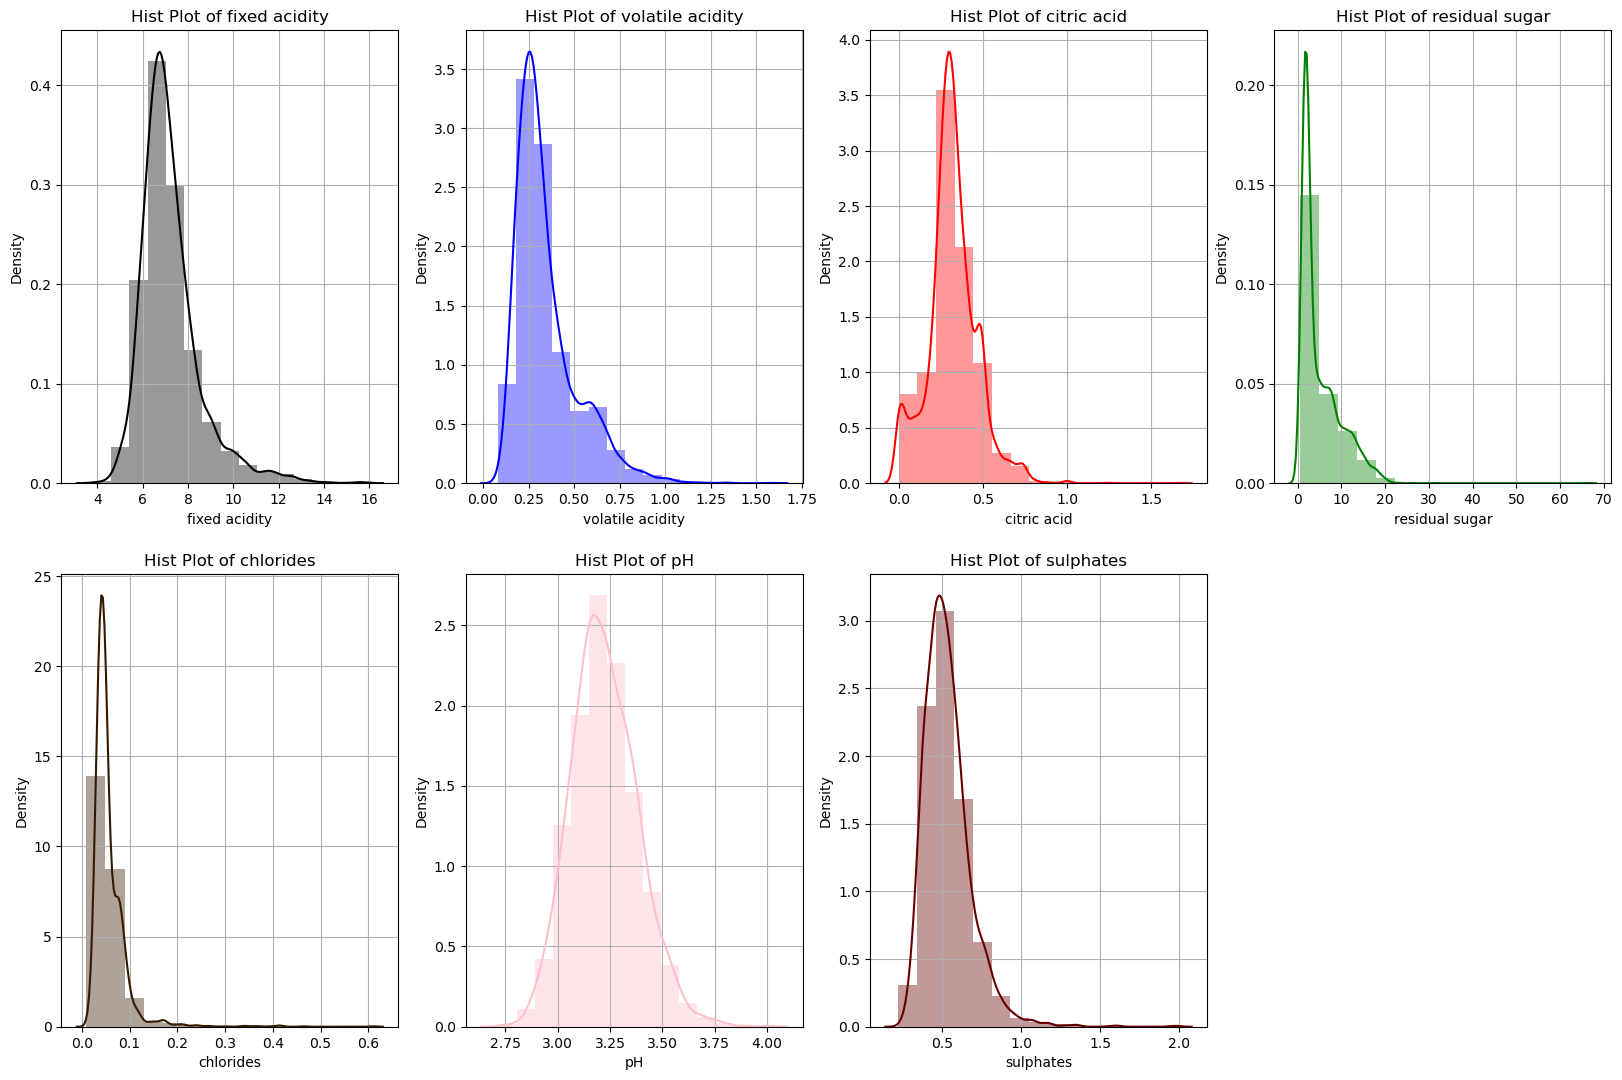

In [13]:
## histplots before filling the miss values in columns
pt.figure(figsize=(20, 20))
color = ['k','b','r','g','#331900','pink','#660000']
for i, feature in enumerate(list(columns_having_missing.keys())):
    pt.subplot(3,4 ,i + 1)
    sns.distplot(df[feature],color=color[i],bins=15)
    pt.grid(axis='both')
    pt.title(f'Hist Plot of {feature}')

In [14]:
##Filling the missing values with its column's mean 
for feature in columns_having_missing.keys():
    df[feature].fillna(df[feature].mean(),inplace=True)

#### histplots after filling the miss values in columns

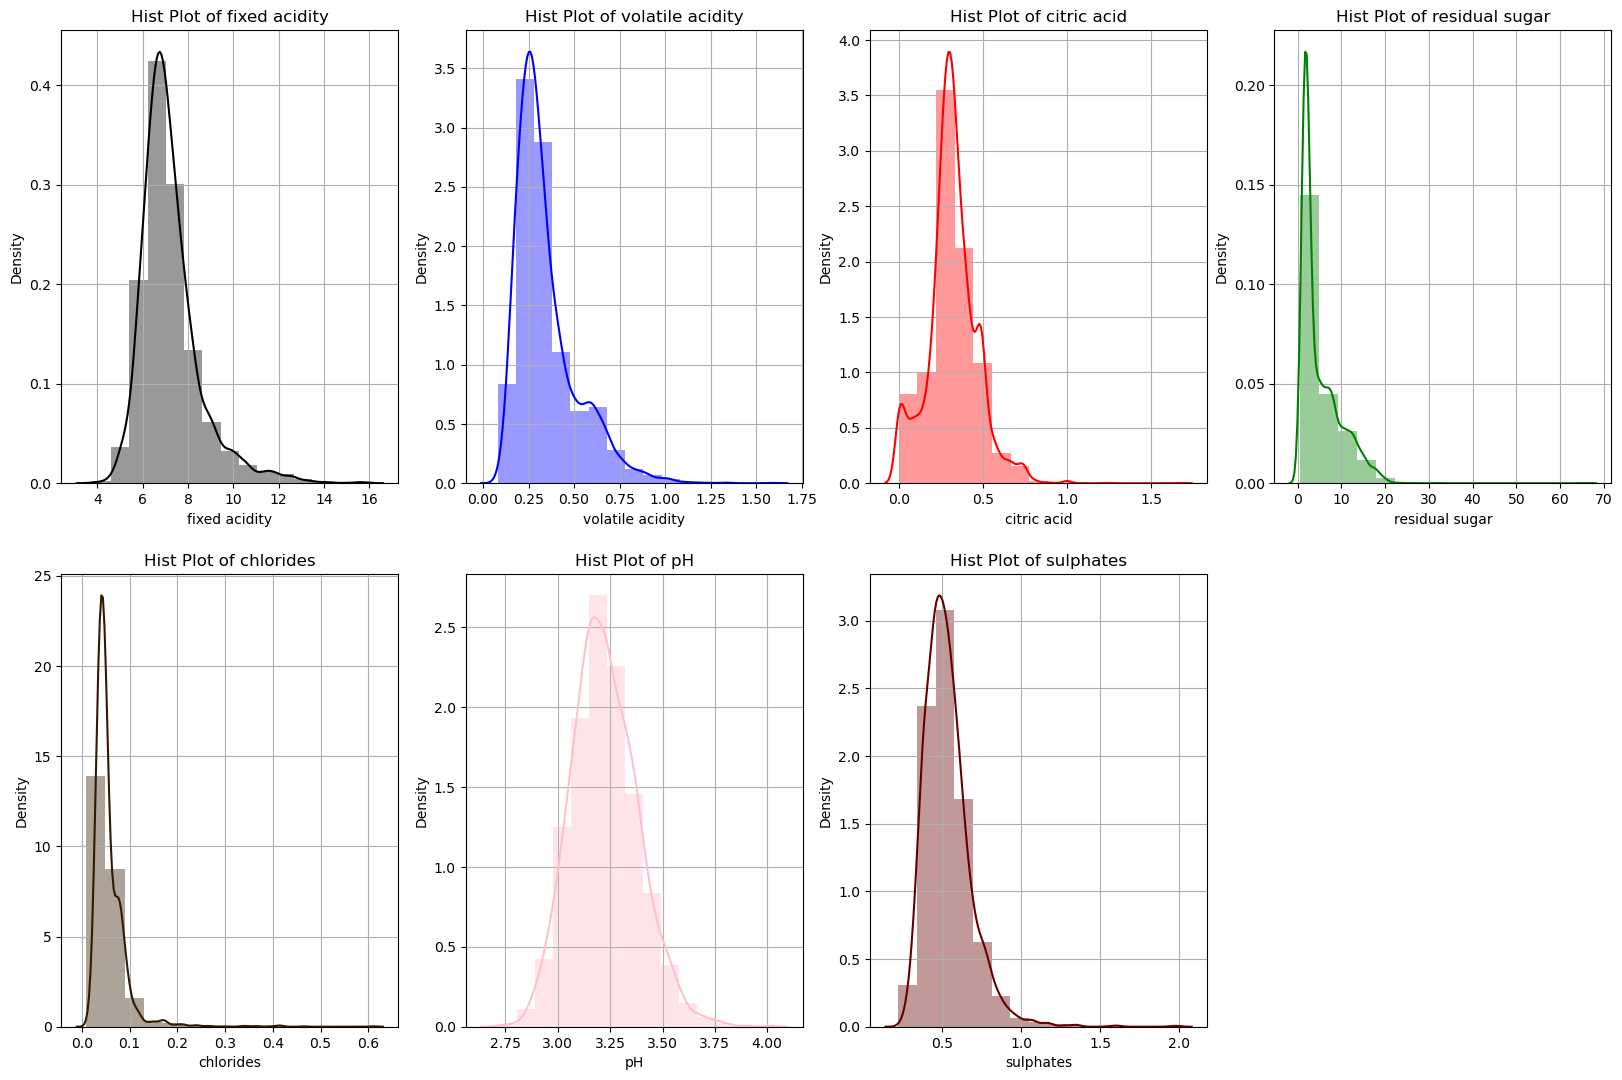

In [15]:
## seeing the distribution after filling the histplots
pt.figure(figsize=(20, 20))
color = ['k','b','r','g','#331900','pink','#660000']
for i, feature in enumerate(list(columns_having_missing.keys())):
    pt.subplot(3,4 ,i + 1)
    sns.distplot(df[feature],color=color[i],bins=15)
    pt.grid(axis='both')
    pt.title(f'Hist Plot of {feature}')

<Axes: >

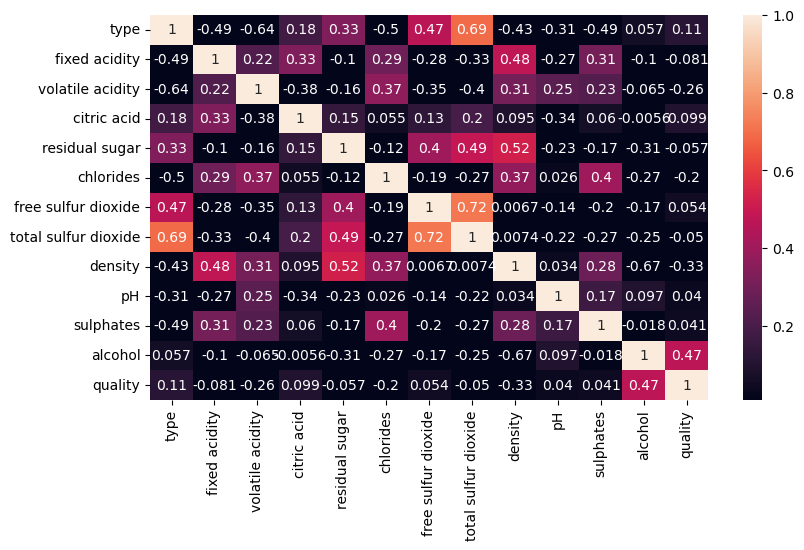

In [16]:
## corrlation matrxi
pt.figure(figsize=(9,5))
sns.heatmap(df.corr(),annot=True,vmin=0.01)

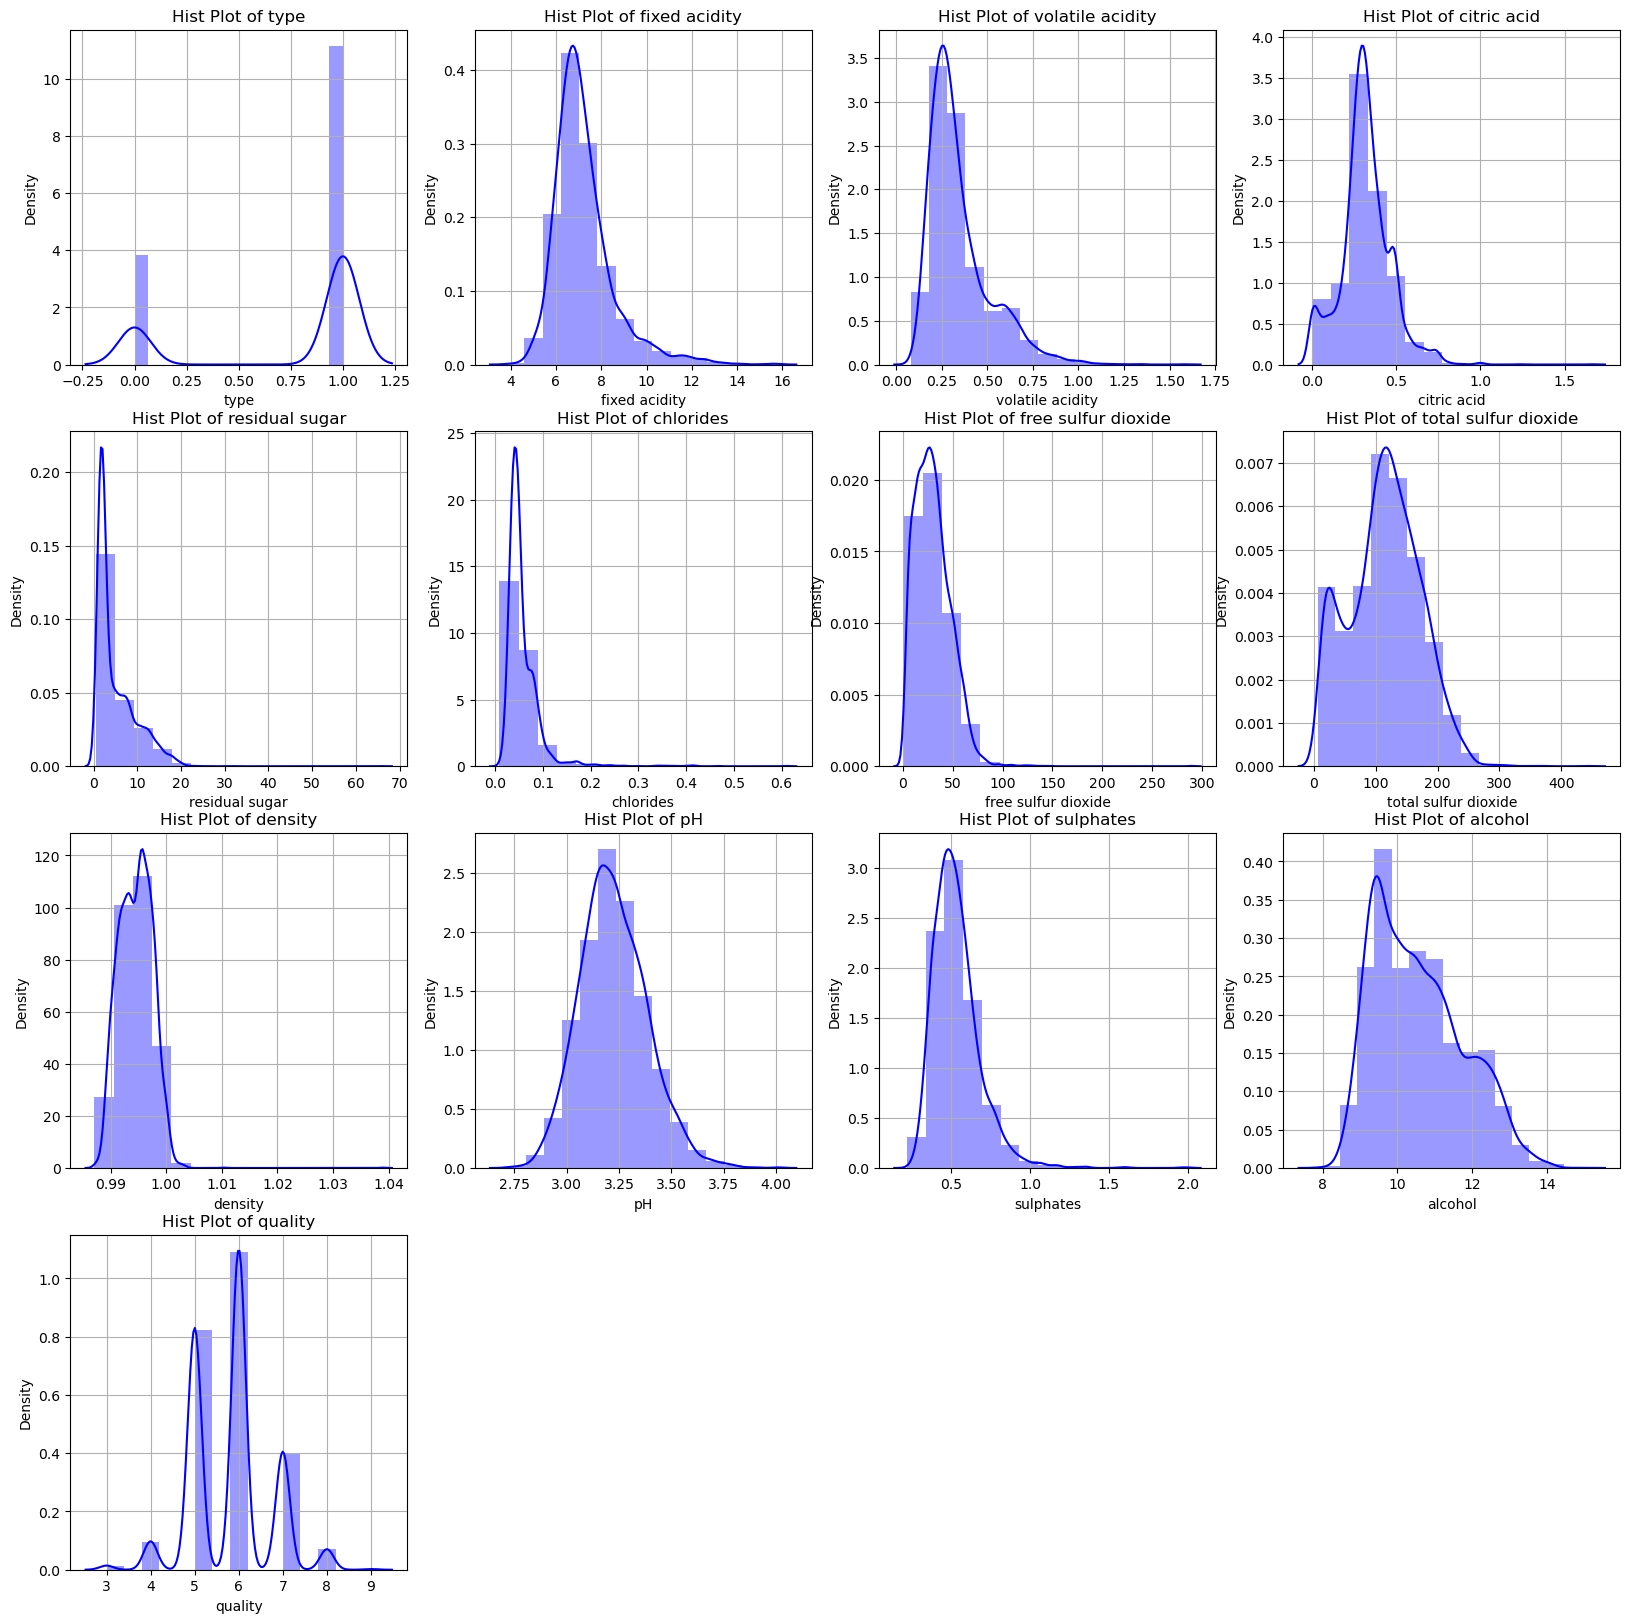

In [17]:
## Univaraity analysis
pt.figure(figsize=(20, 20))
for i, feature in enumerate(df.columns):
    pt.subplot(4,4 ,i + 1)
    sns.distplot(df[feature],color='blue',bins=15)
    pt.grid(axis='both')
    pt.title(f'Hist Plot of {feature}')

In [18]:
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
6     1            6.2              0.32         0.16             7.0   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
6      0.045                 30.0                 136.0   0.9949  3.18   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
6       0.47      9.6        6

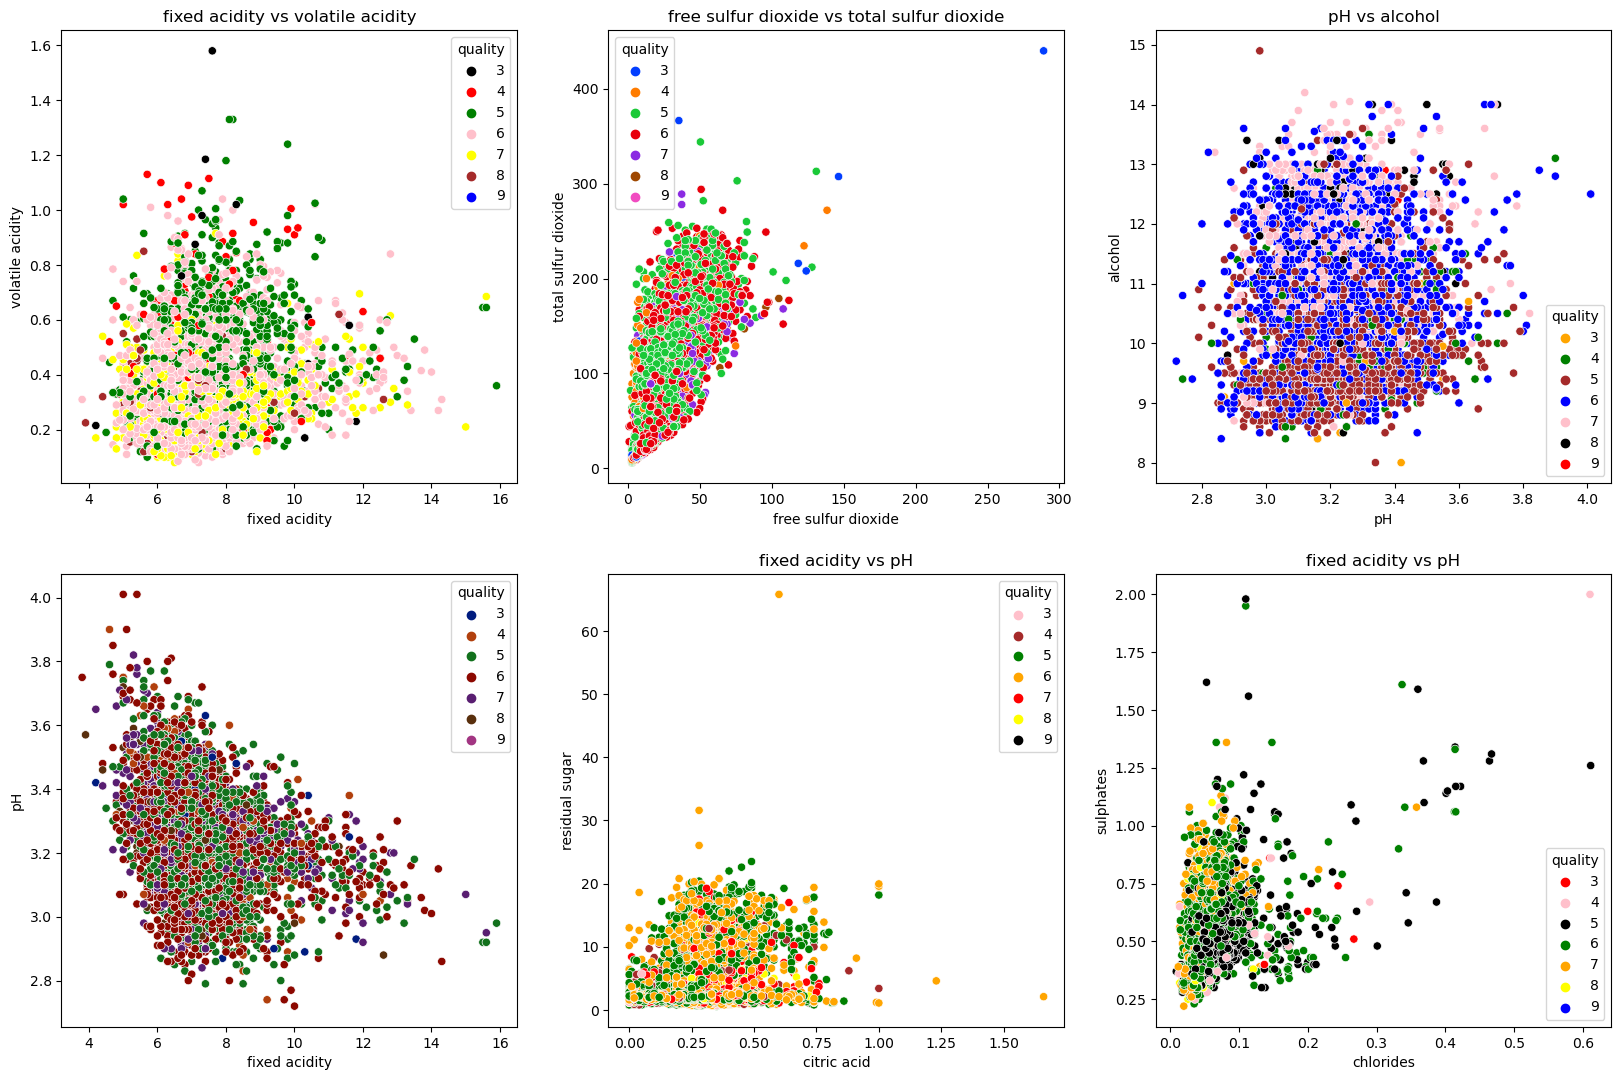

In [19]:
## Bivariate Analysis
pt.figure(figsize=(20,20))
pt.title('Bivariat Analysis')
pt.subplot(3,3,1)
sns.scatterplot(df,x='fixed acidity',y='volatile acidity',color='g',hue='quality',palette=['black','red','green','pink','yellow','brown','blue'])
pt.title('fixed acidity vs volatile acidity')

pt.subplot(3,3,2)
sns.scatterplot(df,x='free sulfur dioxide',y='total sulfur dioxide',hue='quality',palette='bright')
pt.title('free sulfur dioxide vs total sulfur dioxide')

pt.subplot(3,3,3)
sns.scatterplot(df,x='pH',y='alcohol',hue='quality',palette=['orange','green','brown','blue','pink','black','red'])
pt.title('pH vs alcohol')

pt.subplot(3,3,4)
sns.scatterplot(df,x='fixed acidity',y='pH',hue='quality',palette='dark')

         
pt.subplot(3,3,5)
sns.scatterplot(df,x='citric acid',y='residual sugar',hue='quality',palette=['pink','brown','green','orange','red','yellow','black'])
pt.title('fixed acidity vs pH')

pt.subplot(3,3,6)
sns.scatterplot(df,x='chlorides',y='sulphates',hue='quality',palette=['red','pink','black','green','orange','yellow','blue'])
pt.title('fixed acidity vs pH')
pt.show()

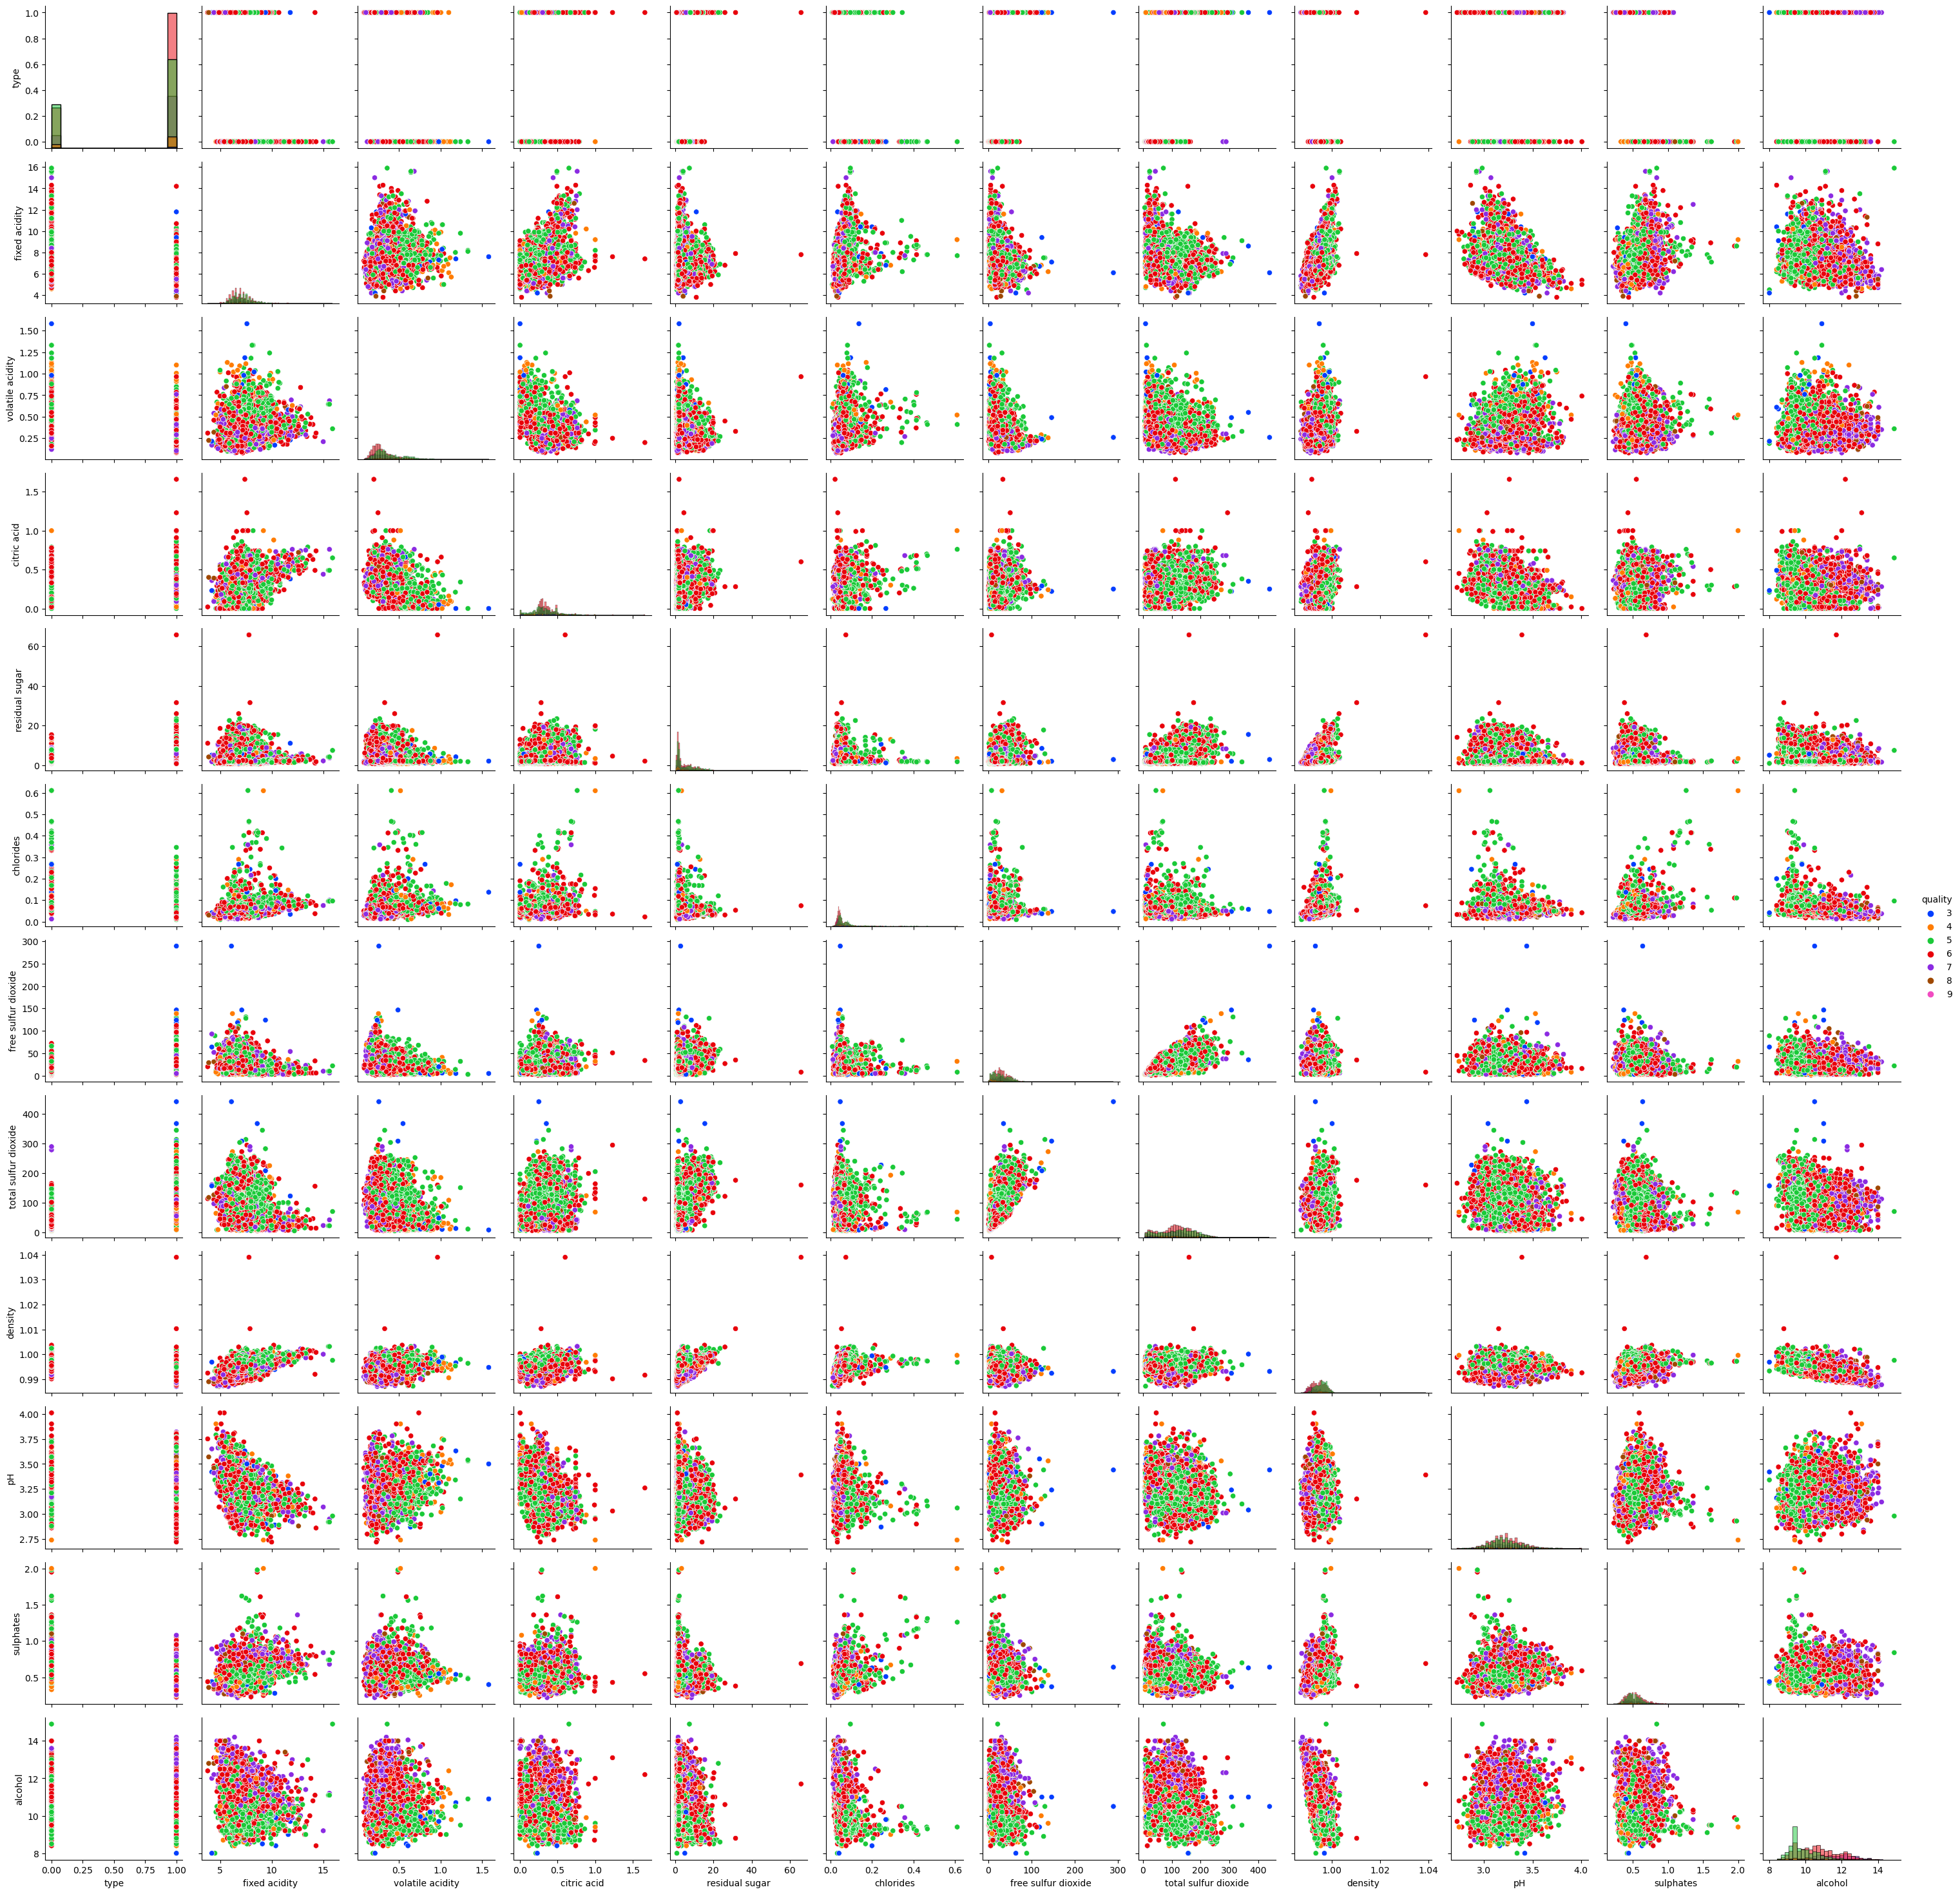

In [20]:
g = sns.PairGrid(df, hue="quality",palette='bright')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Outliers

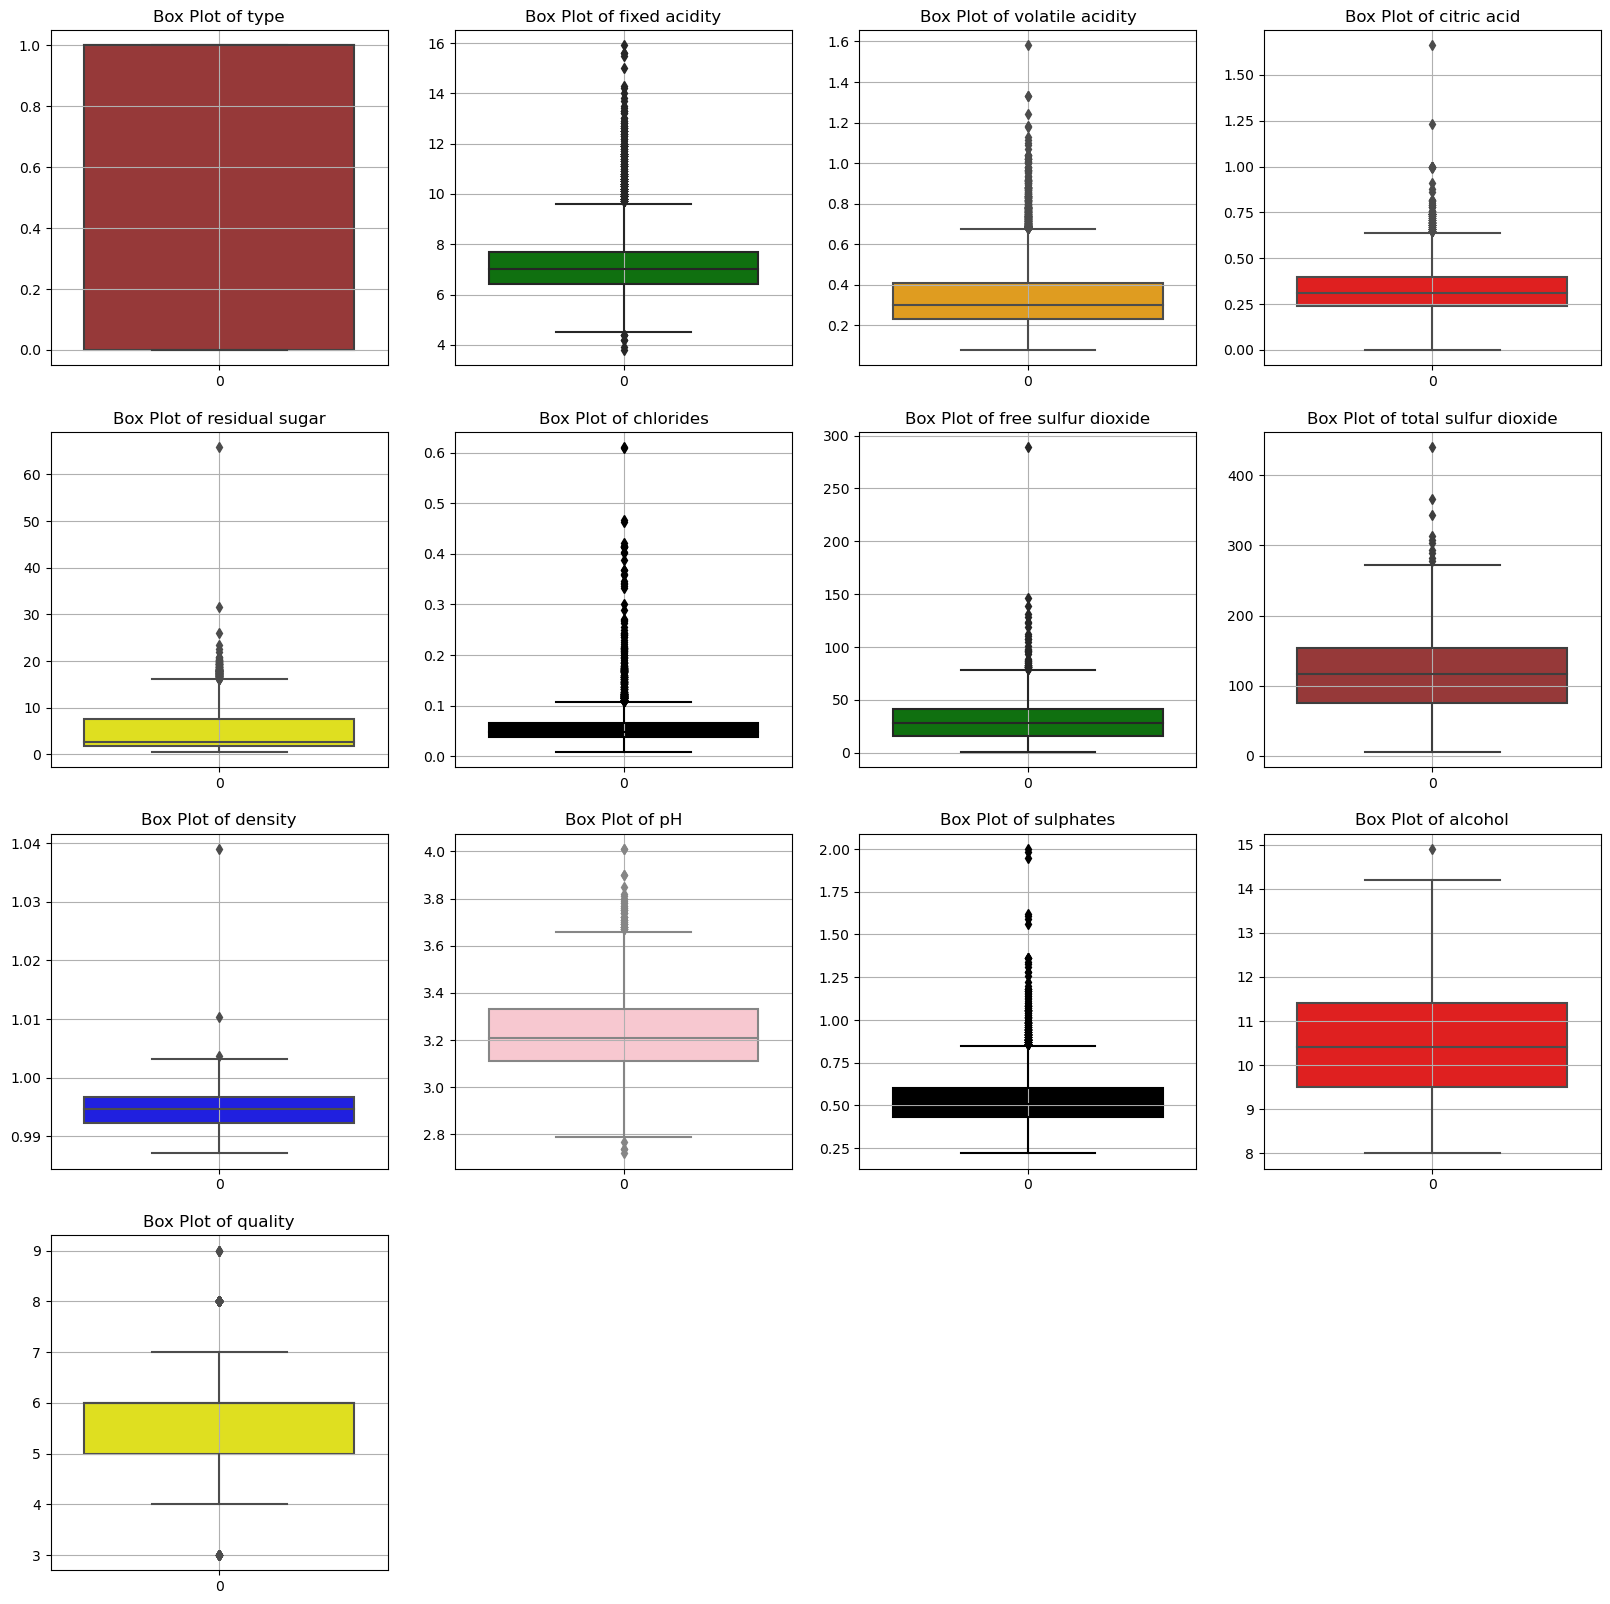

In [21]:
pt.figure(figsize=(20, 20))
colors = ['pink','brown','green','orange','red','yellow','black','green','brown','blue','pink','black','red','yellow']
for i, feature in enumerate(df.columns):
    pt.subplot(4,4 ,i + 1)
    sns.boxplot(df[feature],color=colors[i+1])
    pt.grid(axis='both')
    pt.title(f'Box Plot of {feature}')

#### Mapping the taget output classes as Low,Medium,High Quality

##### Target column have 3,4,5,6,7,8,9 are output classes Generaizing output classes
- (3,4)   --> LOW Quality
- (5,6,7) --> MEDIUM Quality 
- (8,9)   --> HIGH Quality

In [22]:
### Mapping to output classes
df['quality'] = df['quality'].map({3:'Low',4:'Low',5:'Medium',6:'Medium',7:'Medium',8:'High',9:'High'})


In [23]:
df['quality'] = df['quality'].map({'Low':0,'Medium':1,"High":2})

In [24]:
df.quality.unique()

array([1, 2, 0], dtype=int64)

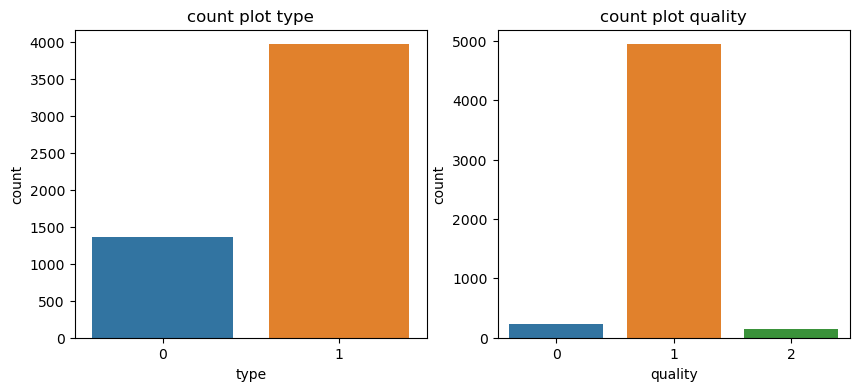

In [25]:
## categorical feature count plot
pt.figure(figsize=(10,4))
for i,feature in enumerate(df[['type','quality']].columns):
    pt.subplot(1,2,i+1)
    sns.countplot(df,x=feature)
    pt.title('count plot '+feature)

In [26]:
##checking the data is whether is imbalanced dataset
print('Low',len(df[df['quality']==0]))
print('Medium',len(df[df['quality']==1]))
print('High',len(df[df['quality']==2]))

Low 236
Medium 4939
High 154


In [27]:
X = df.drop('quality',axis=1)
y = df.quality

In [28]:
print(X.shape)  
print(y.shape)

(5329, 12)
(5329,)


#### Feature Importance

In [29]:
#### Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
feature_imp= ExtraTreesClassifier()
feature_imp.fit(X,y)
scores = feature_imp.feature_importances_
pd.DataFrame({'Feature': X.columns,'Feature_Importance': (scores*100)}).sort_values(by = 'Feature_Importance', ascending = True)

Feature  Feature_Importance
0                   type            1.024119
8                density            8.073902
5              chlorides            8.266900
3            citric acid            8.410160
1          fixed acidity            8.463813
9                     pH            8.499229
4         residual sugar            8.573696
10             sulphates            8.792134
7   total sulfur dioxide            8.861663
11               alcohol            9.442263
2       volatile acidity           10.767609
6    free sulfur dioxide           10.824512

#### Converting the Imbalanced dataset into Balanced dataset

In [30]:
# transform the dataset in to balanced formet
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
X, y = oversample.fit_resample(X, y)

In [31]:
print(X.shape) 
print(y.shape)

(14817, 12)
(14817,)


In [32]:
y.value_counts()

1    4939
2    4939
0    4939
Name: quality, dtype: int64

(1000.0, 5000.0)

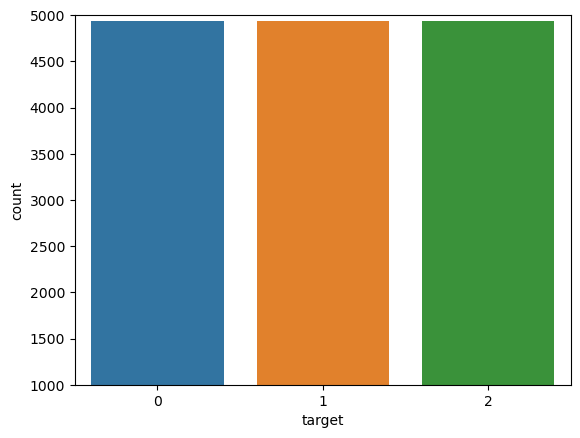

In [33]:
### The target classes in balanced formet
y_df = pd.DataFrame(np.array(y),columns=['target'])
sns.countplot(y_df,x='target')
pt.ylim([1000,5000])

In [34]:
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
6     1            6.2              0.32         0.16             7.0   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
6      0.045                 30.0                 136.0   0.9949  3.18   

   sulphates  alcohol  quality  
0       0.45      8.8        1  
1       0.49      9.5        1  
2       0.44     10.1        1  
3       0.40      9.9        1  
6       0.47      9.6        1

In [35]:
### Train Test Split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Feature Scaling

#### Model Training

In [37]:
#### Model selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

models = {'Logistic Regression':LogisticRegression(),
          'Support Vector Machine':SVC(),
          'DecsionTree':DecisionTreeClassifier(),
          'RadomForestClassier':RandomForestClassifier(),
         'AdaBosster':AdaBoostClassifier(),
          'XGBboost':XGBClassifier()}

In [38]:
for i in range(len(models)):
    model =list(models.values())[i]
    model.fit(X_train,y_train)
    print(list(models.keys())[i]+' score: ',model.score(X_test,y_test))
    cros_score = cross_val_score(model,X_train,y_train,cv=5)
    print(list(models.keys())[i]+' Cross_Val :',list(cros_score))
    print('mean : ',np.mean(cros_score))
    print('__'*40)


Logistic Regression score:  0.6835357624831309
Logistic Regression Cross_Val : [0.6596372838464782, 0.6625896246309574, 0.6748207507380852, 0.6620253164556962, 0.6662447257383967]
mean :  0.6650635402819227
________________________________________________________________________________
Support Vector Machine score:  0.8488529014844804
Support Vector Machine Cross_Val : [0.8304512863770561, 0.8253901307465205, 0.8253901307465205, 0.8227848101265823, 0.8265822784810126]
mean :  0.8261197272955384
________________________________________________________________________________
DecsionTree score:  0.9024966261808367
DecsionTree Cross_Val : [0.8857022353437368, 0.8975115984816533, 0.8810628426824125, 0.8662447257383966, 0.870042194092827]
mean :  0.8801127192678052
________________________________________________________________________________
RadomForestClassier score:  0.9622132253711201
RadomForestClassier Cross_Val : [0.9603542808941375, 0.9502319696330662, 0.956980177140447, 0.953164

##### Here RandomForest,XGBbooster are giving more score compare to other models so I am taking XGBbooster as my final model and doing hyperparameter tuning on it

#### HYPER PARAMETER TUNNIG
##### XGBooster Tunning

In [39]:
Xgb = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
}

In [40]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
dic = {}
grid = GridSearchCV(XGBClassifier(),param_grid=Xgb,cv=5)
grid.fit(X_train,y_train)
dic['xgb'] = grid.best_params_

In [41]:
xgb = XGBClassifier(learning_rate=0.5,max_depth= 7,min_child_weight= 1,n_estimators=200)
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

0.9794197031039136

In [42]:
## freecodecamp.org is the providing cources with certificates

In [43]:
###Test Data
y_pred = xgb.predict(X_test)

#### Model Evolution Metrics

In [44]:
### Perfomence metrics
from sklearn.metrics import f1_score,classification_report,accuracy_score,recall_score,precision_score,confusion_matrix,auc
print('accuracy: ',accuracy_score(y_pred,y_test))
print('recall: ',recall_score(y_pred,y_test,average=None))
print('precision: ',precision_score(y_pred,y_test,average=None))
print('classification report: ',classification_report(y_pred,y_test))


accuracy:  0.9794197031039136
recall:  [0.97810945 0.97507478 0.98535565]
precision:  [0.98103792 0.96544916 0.99262381]
classification report:                precision    recall  f1-score   support

           0       0.98      0.98      0.98      1005
           1       0.97      0.98      0.97      1003
           2       0.99      0.99      0.99       956

    accuracy                           0.98      2964
   macro avg       0.98      0.98      0.98      2964
weighted avg       0.98      0.98      0.98      2964



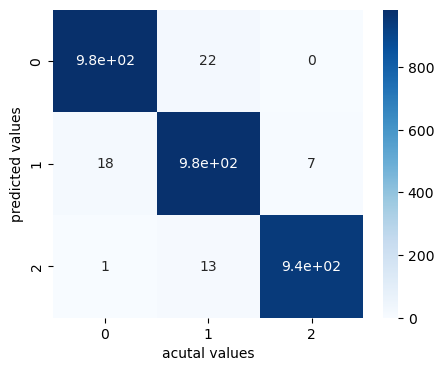

In [45]:
##Heatmap
pt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,cmap='Blues')
pt.xlabel('acutal values')
pt.ylabel('predicted values')
pt.show()

In [46]:
accuracy_dataframe3 = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

In [47]:
print( 'Acutally points are incorrectly classified', sum(accuracy_dataframe3['y_test']-accuracy_dataframe3['y_pred']),'points')

Acutally points are incorrectly classified -4 points


#### pickle file

In [48]:
###pickle file
import pickle
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

In [49]:
with open('model_pkl' , 'rb') as f:
    model = pickle.load(f)

In [55]:
model.predict([[1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8]])

array([1], dtype=int64)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0      0.558218      -0.267002         -0.141510    -0.077361        1.151248   
1     -1.791413       0.180668          0.416292    -0.705278       -0.794121   
2      0.558218      -0.351072         -0.958576     0.146309        0.620887   
3      0.558218      -0.782409         -0.741193    -0.040523        0.009841   
4     -1.791413       5.049164          0.031361     1.736335       -0.488040   
...         ...            ...               ...          ...             ...   
11848 -1.791413       0.049096         -0.022739     0.073851       -0.674434   
11849  0.558218      -0.450911         -0.330740     0.037565       -0.866133   
11850  0.558218      -0.372959         -0.468455    -0.441460       -0.783863   
11851  0.558218       0.965775         -1.158839     1.230361       -0.754318   
11852 -1.791413      -0.375970          1.747575    -2.239169       -0.768972   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
0      -0.151244             0.242421              0.482491 -0.303445   
1       0.155796            -0.958804             -0.855362  0.383457   
2      -1.001424             1.417935              1.412147 -0.188382   
3       0.009030             0.468870              1.652494  0.778659   
4       0.844466            -1.203054             -1.698729  2.404329   
...          ...                  ...                   ...       ...   
11848   0.271377            -0.685112             -1.480419  0.311864   
11849  -0.962404             0.029690             -0.363427 -1.284225   
11850   0.386009            -0.283124              1.463601  0.154359   
11851   0.120564             0.143596             -0.206942  0.170001   
11852   0.666962            -1.250190             -1.842633  0.074933   

             pH  sulphates   alcohol  
0     -0.603955  -0.977682  0.756682  
1      0.743607  -0.323208 -0.723386  
2      0.196951  -1.032691  0.260674  
3      2.563524   0.996933 -0.620585  
4     -1.685942   0.145361 -1.198428  
...         ...        ...       ...  
11848 -0.034493   1.485720  0.324567  
11849  0.143943  -0.630353  1.270169  
11850  0.907386   0.407526 -0.896936  
11851 -0.562956  -0.771726 -0.477010  
11852  0.727074  -1.034875 -0.360810  

[11853 rows x 12 columns]

type  min:  -1.7914133894269582 max:  0.5582184468990057
fixed acidity  min:  -2.7009417451852435 max:  7.299194972380526
volatile acidity  min:  -1.5916385117650589 max:  6.523361059075861
citric acid  min:  -2.2391690584648276 max:  9.759623509676054
residual sugar  min:  -1.047222995773308 max:  16.31408362434756
chlorides  min:  -1.327238201302103 max:  16.830619886529533
free sulfur dioxide  min:  -1.410230891069536 max:  13.50650574253223
total sulfur dioxide  min:  -1.880653945891594 max:  6.01489847826907
density  min:  -2.379969295135701 max:  16.015994871826216
pH  min:  -3.4034486417873326 max:  5.118028134634558
sulphates  min:  -2.112084124751728 max:  10.303866793105602
alcohol  min:  -2.320634886002669 max:  3.210240773912803


In [53]:
for i in X.columns:
    print(i," min: ",df[i].min(),'max: ',df[i].max())


type  min:  0 max:  1
fixed acidity  min:  3.8 max:  15.9
volatile acidity  min:  0.08 max:  1.58
citric acid  min:  0.0 max:  1.66
residual sugar  min:  0.6 max:  65.8
chlorides  min:  0.009 max:  0.611
free sulfur dioxide  min:  1.0 max:  289.0
total sulfur dioxide  min:  6.0 max:  440.0
density  min:  0.98711 max:  1.03898
pH  min:  2.72 max:  4.01
sulphates  min:  0.22 max:  2.0
alcohol  min:  8.0 max:  14.9


In [56]:
X.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
4     1            6.2              0.32         0.16             7.0   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.045                 30.0                 136.0   0.9949  3.18   

   sulphates  alcohol  
0       0.45      8.8  
1       0.49      9.5  
2       0.44     10.1  
3       0.40      9.9  
4       0.47      9.6